# Healthcare Cost Analysis & Prediction

In this notebook, we analyze healthcare cost data and build a predictive model to estimate medical charges based on patient characteristics such as age, BMI, smoking status, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
df = pd.read_csv('.//Healthcare_costs.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,ID,AgeGroup,BMI_Category
0,19,female,27.900,0,yes,southwest,16884.92400,1,Teen,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,2,Teen,Obese
2,28,male,33.000,3,no,southeast,4449.46200,3,Young Adult,Obese
3,33,male,22.705,0,no,northwest,21984.47061,4,Young Adult,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,5,Young Adult,Overweight


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           1338 non-null   int64  
 1   sex           1338 non-null   object 
 2   bmi           1338 non-null   float64
 3   children      1338 non-null   int64  
 4   smoker        1338 non-null   object 
 5   region        1338 non-null   object 
 6   charges       1338 non-null   float64
 7   ID            1338 non-null   int64  
 8   AgeGroup      1338 non-null   object 
 9   BMI_Category  1338 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 104.7+ KB


In [6]:
df.describe()

,age,bmi,children,charges,ID
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,669.500000
std,14.049960,6.098187,1.205493,12110.011237,386.391641
min,18.000000,15.960000,0.000000,1121.873900,1.000000
25%,27.000000,26.296250,0.000000,4740.287150,335.250000
50%,39.000000,30.400000,1.000000,9382.033000,669.500000
75%,51.000000,34.693750,2.000000,16639.912515,1003.750000
max,64.000000,53.130000,5.000000,63770.428010,1338.000000


In [7]:
# Check for nulls
df.isnull().sum()

age             0
sex             0
bmi             0
children        0
smoker          0
region          0
charges         0
ID              0
AgeGroup        0
BMI_Category    0
dtype: int64

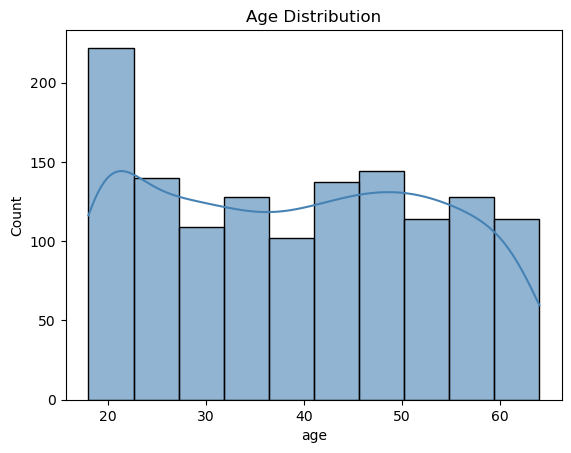

In [9]:
sns.histplot(data=df, x='age', kde=True, bins=10, color='steelblue', alpha=0.6)
plt.title('Age Distribution')
plt.ylabel('Count')
plt.show()

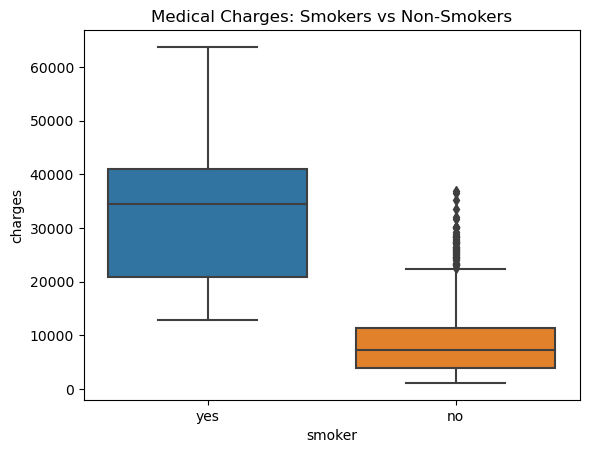

In [10]:
sns.boxplot(data=df, x='smoker', y='charges')
plt.title('Medical Charges: Smokers vs Non-Smokers')
plt.show()

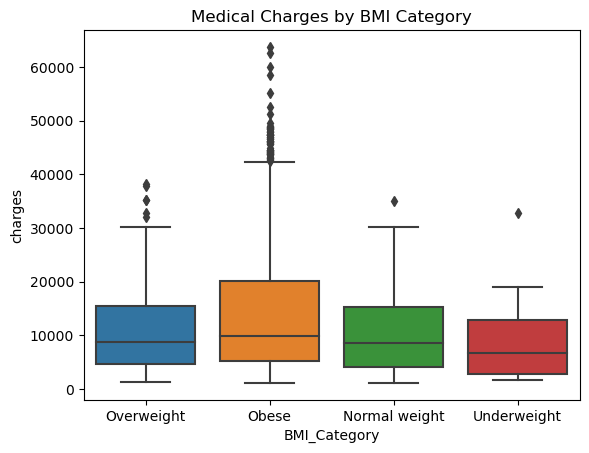

In [11]:
sns.boxplot(data=df, x='BMI_Category', y='charges')
plt.title('Medical Charges by BMI Category')
plt.show()

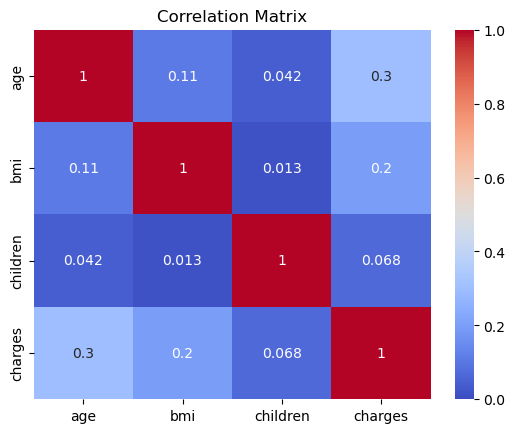

In [12]:
corr = df[['age', 'bmi', 'children', 'charges']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [13]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [14]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

MAE: 4382.06
R² Score: 0.78


### Conclusion
- Age, BMI, and smoking status are key drivers of medical charges.
- Smokers pay significantly more in healthcare costs.
- Linear Regression provides a decent baseline model (R² ~ 0.77, MAE ~ 4,382).
- Future improvements could include tree-based models, interaction terms, or regional analysis.